## Домашняя работа

Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv(r'D:\Курсы Питон\Титаник\train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Easy
Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту.

In [156]:
df_age = df[["Age"]].dropna(axis=0, how='any')
A = (df_age[df_age["Age"] < 18].count())/(df_age["Age"].count())*100
A  # А - процент детей на борту (младше 18 лет)

Age    15.826331
dtype: float64

In [157]:
df_sex = df[["Sex"]].dropna(axis=0, how='any')

In [158]:
M = int(df_sex[df_sex["Sex"] == "male"].count())
M

577

In [159]:
F = int(df_sex[df_sex["Sex"] == "female"].count())
F

314

In [160]:
MF_ratio = M / F
MF_ratio

1.8375796178343948

In [161]:
MF_ratio.as_integer_ratio()

(8275722882142599, 4503599627370496)

##### Normal
Посчитать по скольким людям нет информации (пола или возраста).

In [162]:
dff = df[["Age", "Sex"]].dropna(axis=0, how='any')
NoInfo = int(df["PassengerId"].count()) - int(dff["Age"].count())
NoInfo # число пассажиров, по которым нет информации

177

Вывести гистограмму по возрасту пассажиров

<AxesSubplot:xlabel='Age', ylabel='Count'>

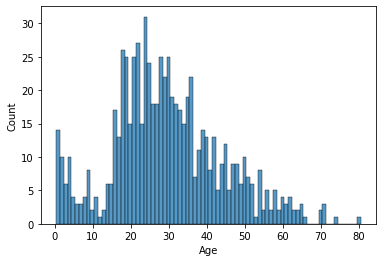

In [163]:
sns.histplot(df_age["Age"], binwidth=1)

Посчитать какой процент мужчин и женщин выжили, какой процент детей выжили.

In [164]:
df_by_sex = df.groupby(["Sex", "Survived"])["PassengerId"].count() # это просмотр абсолютных значений для проверки расчетов
df_by_sex.head(10)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [165]:
df_by_sex = df.groupby(["Sex", "Survived"]).size() / len(df) * 100
df_by_sex # распределение в % выживших/не выживших мужчин и женщин

Sex     Survived
female  0            9.090909
        1           26.150393
male    0           52.525253
        1           12.233446
dtype: float64

In [166]:
df_female = df[df["Sex"] == "female"]
df_female.groupby(["Survived"]).size() / len(df_female) * 100

Survived
0    25.796178
1    74.203822
dtype: float64

In [168]:
df_male = df[df["Sex"] == "male"]
df_male.groupby(["Survived"]).size() / len(df_male) * 100

Survived
0    81.109185
1    18.890815
dtype: float64

In [169]:
df["age_category"] = df["Age"].apply(lambda x: "child" if x < 18 else "adult")
df_children = df[df["age_category"] == "child"]
df_children.groupby(["Survived"]).size() / len(df_children) * 100

Survived
0    46.017699
1    53.982301
dtype: float64

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью.

In [176]:
df_corr = df[["Age", "Sex", "Survived"]].dropna(axis=0, how='any')

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0
...,...,...,...
885,39.0,female,0
886,27.0,male,0
887,19.0,female,1
889,26.0,male,1


In [178]:
from scipy.stats import pointbiserialr
pointbiserialr(df_corr["Survived"], df_corr["Age"]) # бисериальный коэффициент корреляции равен -0.08 (p = 0.039), зависимости практически нет

PointbiserialrResult(correlation=-0.07722109457217767, pvalue=0.039124654013465966)

In [143]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [181]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(df["Sex"], df["Survived"])) # очень низкое значение p-value (1.1973570627755645e-58) говорит о том, что связь между выживаемостью и полом статистически подтверждается

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [182]:
fisher_exact(pd.crosstab(df["Sex"], df["Survived"])) # по тесту Фишера также очень низкое значение p-value (6.46392156458115e-60) указывает на взаимосвязь двух признаков (пол и выживаемость)

(0.08096731594585672, 6.46392156458115e-60)

#### Hard
Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

#### на него пока времени не хватило